In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Problem Description:
# The problem is to develop an unsupervised learning model for credit card fraud detection. The dataset contains credit card transactions made by European cardholders, and the task is to identify fraudulent transactions based on patterns and anomalies in the data. The dataset presents an imbalanced distribution, with a small fraction of transactions being fraudulent.

In [86]:
import pandas as pd
import numpy as np


data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
test=data

missing_values = data.isnull().sum()
print(missing_values)


data=data.dropna()


from sklearn.preprocessing import StandardScaler

# Normalize and scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert the scaled_data back to a DataFrame 
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)


data=scaled_data

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [87]:
len(data)

284807

In [88]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,-0.041599
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,-0.041599
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,-0.041599
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,-0.041599
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,-0.041599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151,-0.041599
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117,-0.041599
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839,-0.041599
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249,-0.041599


In [89]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  
pca_data = pca.fit_transform(data)





In [90]:
data=pca_data

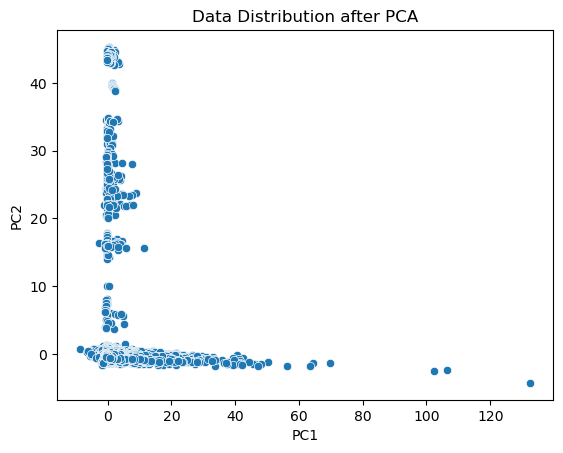

In [91]:
# After PCA: Visualize data distribution
import seaborn as sns
import matplotlib.pyplot as plt
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
sns.scatterplot(data=pca_df, x='PC1', y='PC2')
plt.title('Data Distribution after PCA')
plt.show()

In [92]:
from sklearn.neighbors import LocalOutlierFactor

# Apply LOF for outlier detection
lof = LocalOutlierFactor(contamination='auto')
outlier_scores = lof.fit_predict(data)





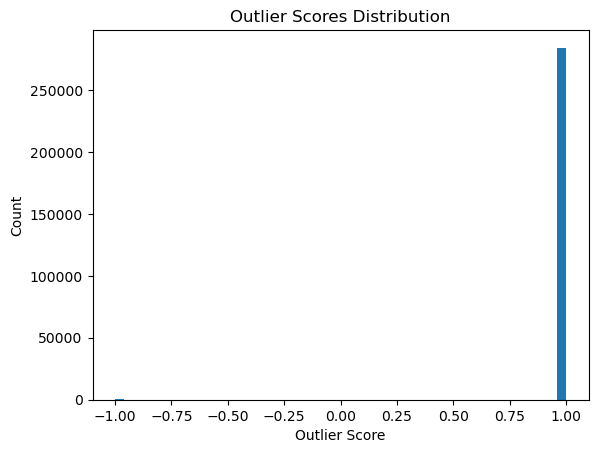

In [93]:
# Visualize Outlier Scores
plt.hist(outlier_scores, bins=50)
plt.xlabel('Outlier Score')
plt.ylabel('Count')
plt.title('Outlier Scores Distribution')
plt.show()

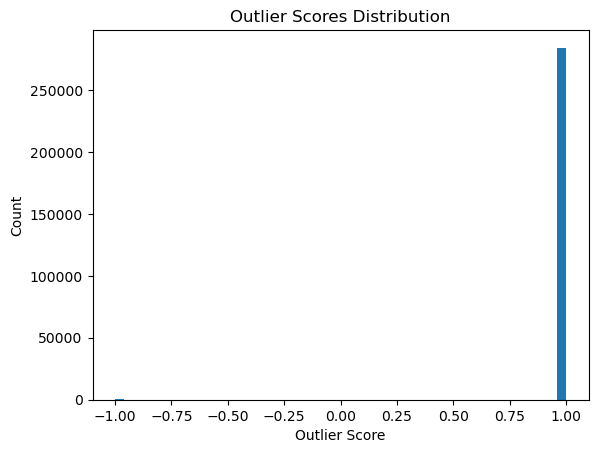

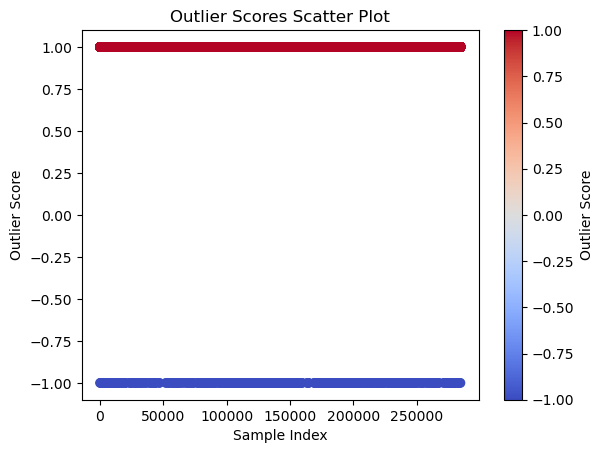

In [94]:
# Visualize Outlier Scores - Histogram
plt.hist(outlier_scores, bins=50)
plt.xlabel('Outlier Score')
plt.ylabel('Count')
plt.title('Outlier Scores Distribution')
plt.show()

# Visualize Outlier Scores - Scatter Plot
plt.scatter(range(len(outlier_scores)), outlier_scores, c=outlier_scores, cmap='coolwarm')
plt.colorbar(label='Outlier Score')
plt.xlabel('Sample Index')
plt.ylabel('Outlier Score')
plt.title('Outlier Scores Scatter Plot')
plt.show()

In [95]:
data=pd.DataFrame(data)

In [96]:


data = data.rename(columns={data.columns[0]: 'PCA1', data.columns[1]: 'PCA2'})


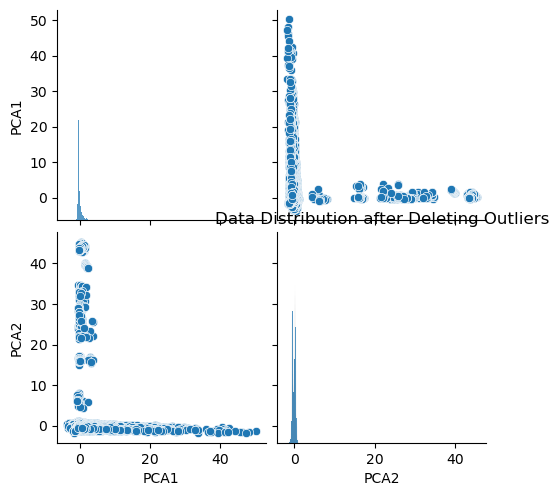

In [97]:
# Delete Outliers
data_no_outliers = data[outlier_scores != -1]  # Remove outliers based on LOF scores
data=pd.DataFrame(data_no_outliers)
# Visualize data distribution after deleting outliers
sns.pairplot(data, vars=['PCA1', 'PCA2'])  
plt.title('Data Distribution after Deleting Outliers')
plt.show()

In [98]:
data

,PCA1,PCA2
0,0.415766,0.691725
1,-0.391512,0.589205
2,1.884253,0.683115
3,0.334165,0.485406
4,-0.015325,0.382064
...,...,...
284802,-1.456881,-1.357253
284803,-0.365391,-0.286830
284804,-0.189071,-0.524500
284805,-0.483526,-0.470391


In [99]:
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=2)  
cluster_labels = kmeans.fit_predict(data)




/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [101]:
test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [105]:
# Merge "test" with "data" based on index
merged = test.merge(data, left_index=True, right_index=True, how='inner')

# Update "test" to include only the rows that exist in both "data" and "test"
test = merged.copy()


In [107]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Evaluate the model's performance
labels_true = test['Class'].values  # Assuming 'Class' is the target variable
labels_predicted = cluster_labels  # Use the predicted labels from clustering

precision = precision_score(labels_true, labels_predicted)
recall = recall_score(labels_true, labels_predicted)
f1 = f1_score(labels_true, labels_predicted)
roc_auc = roc_auc_score(labels_true, labels_predicted)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)



Precision: 0.9376391982182628
Recall: 1.0
F1-score: 0.967816091954023
ROC AUC: 0.9999506435725593


In [109]:
# Fine-tune K-means clustering
for n_clusters in range(2, 10):  # Try different values for the number of clusters
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(data)

    # Evaluate the model's performance
    precision = precision_score(labels_true, cluster_labels, average='micro')
    recall = recall_score(labels_true, cluster_labels, average='micro')
    f1 = f1_score(labels_true, cluster_labels, average='micro')
    roc_auc = roc_auc_score(labels_true, cluster_labels)

    # Print the performance metrics for each value of n_clusters
    print(f"Number of Clusters: {n_clusters}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("ROC AUC:", roc_auc)
    print("-----------------------")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 2
Precision: 0.9999014334394097
Recall: 0.9999014334394097
F1-score: 0.9999014334394097
ROC AUC: 0.9999506435725593
-----------------------


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 3
Precision: 0.9792024557154524
Recall: 0.9792024557154524
F1-score: 0.9792024557154524
ROC AUC: 0.9792209440474385
-----------------------


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 4
Precision: 0.9443380551409501
Recall: 0.9443380551409501
F1-score: 0.9443380551409501
ROC AUC: 0.9443047970922013
-----------------------


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 5
Precision: 0.08946323467289982
Recall: 0.08946323467289982
F1-score: 0.08946323467289982
ROC AUC: 0.983236441965655
-----------------------


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 6
Precision: 0.8919640091244473
Recall: 0.8919640091244473
F1-score: 0.8919640091244473
ROC AUC: 0.9258225819321929
-----------------------


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 7
Precision: 0.41576079303838465
Recall: 0.41576079303838465
F1-score: 0.41576079303838465
ROC AUC: 0.42669113028236977
-----------------------


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 8
Precision: 0.40215860767692696
Recall: 0.40215860767692696
F1-score: 0.40215860767692696
ROC AUC: 0.5920666987385749
-----------------------


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 9
Precision: 0.39328057675518885
Recall: 0.39328057675518885
F1-score: 0.39328057675518885
ROC AUC: 0.5817061448442324
-----------------------


In [110]:
best_n_clusters = None
best_f1 = 0

# Fine-tune K-means clustering
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(data)

    # Evaluate the model's performance
    f1 = f1_score(labels_true, cluster_labels, average='micro')

    # Check if current number of clusters gives a better F1-score
    if f1 > best_f1:
        best_f1 = f1
        best_n_clusters = n_clusters
        model = kmeans

# Print the best number of clusters
print("Best Number of Clusters:", best_n_clusters)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Best Number of Clusters: 2
